In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import KFold, train_test_split

# Data gathering

In [2]:
train_set = pd.read_csv('data/train.csv')
train_set[train_set['cfips']==4012]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
3900,4012_2019-08-01,4012,La Paz County,Arizona,2019-08-01,2.336202,399
3901,4012_2019-09-01,4012,La Paz County,Arizona,2019-09-01,2.301071,393
3902,4012_2019-10-01,4012,La Paz County,Arizona,2019-10-01,2.330347,398
3903,4012_2019-11-01,4012,La Paz County,Arizona,2019-11-01,2.330347,398
3904,4012_2019-12-01,4012,La Paz County,Arizona,2019-12-01,2.330347,398
3905,4012_2020-01-01,4012,La Paz County,Arizona,2020-01-01,2.319528,401
3906,4012_2020-02-01,4012,La Paz County,Arizona,2020-02-01,2.325312,402
3907,4012_2020-03-01,4012,La Paz County,Arizona,2020-03-01,2.325312,402
3908,4012_2020-04-01,4012,La Paz County,Arizona,2020-04-01,2.360018,408
3909,4012_2020-05-01,4012,La Paz County,Arizona,2020-05-01,2.516196,435


In [3]:
train_set.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [4]:
train_set.dtypes

row_id                    object
cfips                      int64
county                    object
state                     object
first_day_of_month        object
microbusiness_density    float64
active                     int64
dtype: object

In [5]:
train_set.describe()

,cfips,microbusiness_density,active
count,122265.000000,122265.000000,1.222650e+05
mean,30376.037640,3.817671,6.442858e+03
std,15143.508721,4.991087,3.304001e+04
min,1001.000000,0.000000,0.000000e+00
25%,18177.000000,1.639344,1.450000e+02
50%,29173.000000,2.586543,4.880000e+02
75%,45077.000000,4.519231,2.124000e+03
max,56045.000000,284.340030,1.167744e+06


In [6]:
revealed_test = pd.read_csv('data/revealed_test.csv')
revealed_test.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,3.442677,1463
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,3.470915,1475
2,1003_2022-11-01,1003,Baldwin County,Alabama,2022-11-01,8.257636,14145
3,1003_2022-12-01,1003,Baldwin County,Alabama,2022-12-01,8.250630,14133
4,1005_2022-11-01,1005,Barbour County,Alabama,2022-11-01,1.247223,247


In [7]:
census_starter = pd.read_csv('data/census_starter.csv')
census_starter.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [8]:
census_starter.describe()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
count,3142.000000,3142.000000,3142.000000,3141.000000,3141.000000,3142.000000,3142.000000,3142.000000,3142.000000,3141.000000,...,3142.000000,3141.000000,3142.000000,3141.000000,3141.000000,3142.000000,3141.000000,3142.000000,3140.000000,3140.000000
mean,69.920401,72.690866,75.398600,78.543298,80.539096,30383.649268,13.813399,14.005379,14.240452,14.631328,...,1.427148,1.382171,1.338956,1.309265,1.272684,49754.163908,51583.175422,53475.909612,55012.443312,58223.339490
std,9.702052,9.255863,8.846665,8.250864,7.889931,15162.508374,5.586649,5.630199,5.689780,5.776940,...,0.986985,0.942777,0.940891,0.990342,0.968579,13154.424871,13703.502202,14192.529173,14649.568591,15541.038914
min,24.500000,25.700000,34.800000,33.300000,37.000000,1001.000000,2.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19264.000000,20188.000000,21504.000000,22292.000000,17109.000000
25%,64.200000,67.425000,70.500000,74.100000,76.400000,18177.500000,9.700000,9.900000,10.100000,10.500000,...,0.800000,0.800000,0.700000,0.700000,0.600000,41123.000000,42480.000000,44155.000000,45653.000000,48179.500000
50%,70.700000,73.600000,76.450000,79.600000,81.700000,29176.000000,12.800000,13.000000,13.250000,13.600000,...,1.300000,1.300000,1.200000,1.200000,1.100000,48065.500000,49888.000000,51757.500000,52842.000000,55907.000000
75%,76.400000,78.800000,81.400000,84.100000,85.900000,45080.500000,16.800000,17.100000,17.300000,17.900000,...,1.900000,1.800000,1.800000,1.800000,1.700000,55763.500000,57611.000000,59867.250000,61500.750000,64930.000000
max,94.600000,95.500000,96.000000,97.100000,97.600000,56045.000000,43.700000,48.000000,45.400000,43.000000,...,17.400000,11.700000,10.500000,15.200000,15.200000,129588.000000,136268.000000,142299.000000,147111.000000,156821.000000


In [9]:
godaddy_1 = pd.read_csv('data/VF_indcom_bundle_Q222/VF_indcom_counties_Q222.csv')
godaddy_1.head()

,cfips,county,state,groupflag,total_pop_20,orders_rank_aug19,orders_rank_sep19,orders_rank_oct19,orders_rank_nov19,orders_rank_dec19,...,avg_traffic_oct21,avg_traffic_nov21,avg_traffic_dec21,avg_traffic_jan22,avg_traffic_feb22,avg_traffic_mar22,avg_traffic_apr22,avg_traffic_may22,avg_traffic_jun22,avg_lifespan_mths
0,1001.0,Autauga,AL,30k - 225k pop,55639.0,668.0,511.0,723.0,624.0,1023.0,...,419.1,455.9,480.9,663.0,629.7,647.6,435.2,415.0,398.9,12.4
1,1003.0,Baldwin,AL,30k - 225k pop,218289.0,804.0,780.0,831.0,899.0,705.0,...,124.2,113.1,108.1,126.7,125.9,135.4,134.5,145.8,152.9,13.9
2,1005.0,Barbour,AL,< 30k pop,25026.0,1001.0,684.0,883.0,1118.0,1159.0,...,157.8,111.6,110.6,133.8,114.5,129.9,153.3,134.6,139.7,15.1
3,1007.0,Bibb,AL,< 30k pop,22374.0,123.0,96.0,113.0,199.0,195.0,...,132.2,124.7,113.1,101.9,69.3,74.4,65.1,69.6,91.1,14.8
4,1009.0,Blount,AL,30k - 225k pop,57755.0,65.0,108.0,203.0,121.0,313.0,...,62.8,70.8,70.9,95.8,67.5,64.8,84.7,108.3,88.4,14.8


In [10]:
godaddy_2 = pd.read_csv('data/VF_indcom_bundle_Q422/VF_indcom_cfips_Q422.csv')
godaddy_2.head()

,cfips,county,state,groupflag,total_pop_20,orders_rank_aug19,orders_rank_sep19,orders_rank_oct19,orders_rank_nov19,orders_rank_dec19,...,top3industries_mar22,top3industries_apr22,top3industries_may22,top3industries_jun22,top3industries_jul22,top3industries_aug22,top3industries_sep22,top3industries_oct22,top3industries_nov22,top3industries_dec22
0,1001.0,Autauga,AL,30k - 225k pop,55639.0,668.0,511.0,723.0,624.0,1023.0,...,"fashion, beauty, fitness_wellness","fashion, beauty, restaurant","fashion, beauty, restaurant","fashion, beauty, realestate","fashion, beauty, realestate","fashion, charity_or_pol, realestate","fashion, realestate, retail","fashion, retail, sports","fashion, realestate, retail","fashion, retail, realestate"
1,1003.0,Baldwin,AL,30k - 225k pop,218289.0,804.0,780.0,831.0,899.0,705.0,...,"transportation, fashion, outdoors","fashion, restaurant, transportation","beauty, restaurant, transportation","beauty, restaurant, hobby","hobby, beauty, transportation","beauty, transportation, hobby","beauty, auto, transportation","auto, hobby, beauty","beauty, fitness_wellness, transportation","beauty, outdoors, transportation"
2,1005.0,Barbour,AL,< 30k pop,25026.0,1001.0,684.0,883.0,1118.0,1159.0,...,"homesvcs, personal",homesvcs,"events, fitness_wellness","artdesign, events","events, homesvcs","events, fitness_wellness","events, artdesign","fitness_wellness, health_med",homesvcs,"homesvcs, fashion, fitness_wellness"
3,1007.0,Bibb,AL,< 30k pop,22374.0,123.0,96.0,113.0,199.0,195.0,...,"health_med, beauty, fashion","beauty, fashion, health_med","homesvcs, beauty, health_med","homesvcs, beauty, health_med","beauty, health_med, fitness_wellness","beauty, fashion, health_med","beauty, fashion, retail","beauty, fashion, health_med","beauty, fashion, homedecor","homedecor, fashion, fitness_wellness"
4,1009.0,Blount,AL,30k - 225k pop,57755.0,65.0,108.0,203.0,121.0,313.0,...,"hobby, profsvcs, fashion","photography, beauty, profsvcs","homedecor, photography, profsvcs","photography, hobby, profsvcs","photography, profsvcs, artdesign","profsvcs, photography, beauty","profsvcs, music, artdesign","hobby, profsvcs, events","hobby, profsvcs, beauty","hobby, profsvcs, music"


In [11]:
godaddy_3 = pd.read_csv('data/all_indicators-all_data/private_employment_raw_in_thousands.csv')
godaddy_3.head()

,Geography,1990-01-01,1990-02-01,1990-03-01,1990-04-01,1990-05-01,1990-06-01,1990-07-01,1990-08-01,1990-09-01,...,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01
0,United States,91048.0,91258.0,91350.0,91309.0,91240.0,91300.0,91264.0,91159.0,91081.0,...,128680.0,129048.0,129379.0,129725.0,130173.0,130406.0,130661.0,130880.0,131082.0,131302.0
1,Alabama,1310.5,1308.2,1305.6,1315.2,1316.8,1322.9,1317.9,1319.1,1318.3,...,1681.0,1680.9,1688.8,1687.8,1692.0,1699.3,1703.3,1706.4,1710.6,1713.1
2,Alaska,162.0,162.8,164.6,166.2,167.1,168.3,167.2,167.2,167.2,...,239.9,240.1,237.4,236.4,237.9,239.8,240.6,243.1,245.0,245.6
3,Arizona,1207.3,1208.2,1210.2,1213.6,1212.1,1213.3,1210.2,1209.7,1211.5,...,2622.9,2635.1,2641.4,2647.4,2669.0,2674.6,2680.0,2686.4,2687.6,2696.8
4,Arkansas,757.7,756.5,757.8,761.0,761.5,765.7,766.6,768.9,770.5,...,1100.1,1101.0,1096.6,1103.0,1115.2,1117.8,1114.6,1113.7,1112.0,1114.5


# Building models

In [12]:
# Validation function
def smape(actual, forecast):
    numerator = np.abs(actual-forecast)
    denominator = (np.abs(actual) + np.abs(forecast))/2
    return 1/len(actual) * np.sum(numerator/denominator)

### Linear regression model

In [13]:
train_set.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


### Basic linear regression - single row

SMAPE result: microbusiness_density    0.026439
dtype: float64


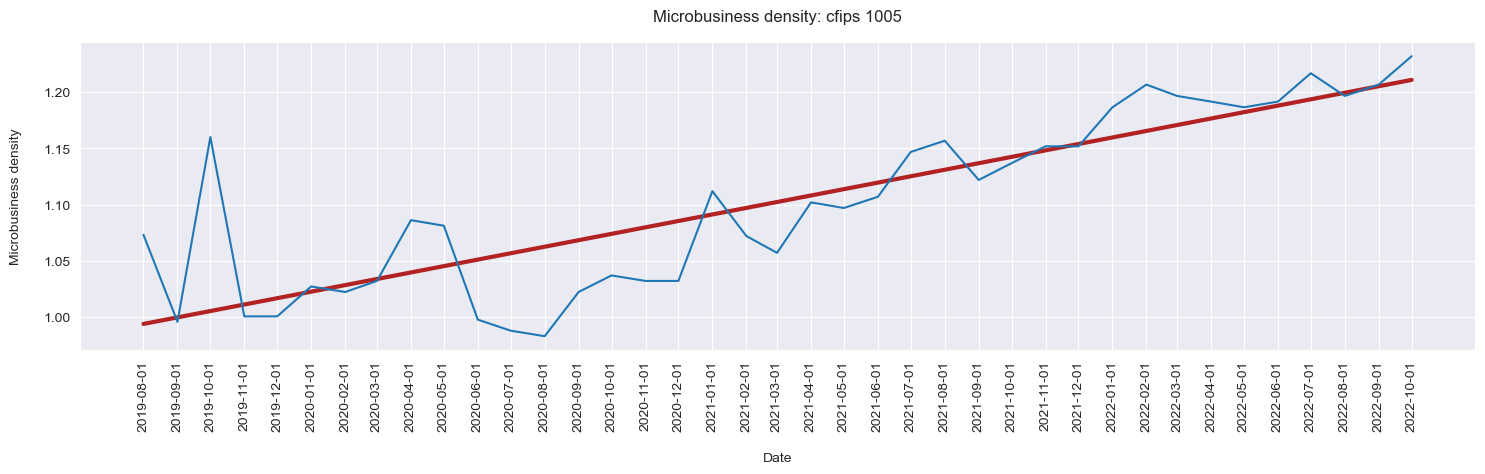

In [14]:
# Prepare data
cfips = 1005
lin_reg_df = train_set[train_set['cfips']==cfips][['first_day_of_month', 'microbusiness_density']]
lin_reg_df['time'] = [datetime.datetime.toordinal(x) for x in pd.to_datetime(lin_reg_df['first_day_of_month'])]
lin_reg_df['first_day_of_month'] = [datetime.datetime.strptime(x, '%Y-%m-%d').date() for x in lin_reg_df['first_day_of_month']]
lin_reg_df.head()

# Training data
lin_reg_X_train = lin_reg_df.loc[:, ['time']]
lin_reg_y_train = lin_reg_df.loc[:, ['microbusiness_density']]
lin_reg_model = linear_model.LinearRegression()
lin_reg_model.fit(lin_reg_X_train, lin_reg_y_train)

# Predicting
y_pred = lin_reg_model.predict(lin_reg_X_train)

# Storing predicted values
y_pred_df = lin_reg_X_train
y_pred_df['predicted'] = y_pred
y_pred_df['first_day_of_month'] = [datetime.datetime.fromordinal(x) for x in y_pred_df['time']]

# SMAPE
smape_result = smape(y_pred, lin_reg_y_train)
print(f'SMAPE result: {smape_result}')

# Plot
fig, ax = plt.subplots(figsize=(18, 4), squeeze=False)

sns.lineplot(
    data=y_pred_df,
    x='first_day_of_month',
    y='predicted',
    ax=ax[0, 0],
    color='firebrick',
    linewidth=3
)

sns.lineplot(
    data=lin_reg_df,
    x='first_day_of_month',
    y='microbusiness_density',
    ax=ax[0, 0]
)
ax[0, 0].set_title(f'Microbusiness density: cfips {cfips}', pad=15)
ax[0, 0].set_xlabel('Date', labelpad=15)
ax[0, 0].set_ylabel('Microbusiness density', labelpad=15)
ax[0, 0].tick_params(axis='x', rotation=90)
ax[0, 0].set_xticks(y_pred_df['first_day_of_month'])

plt.show()

### Linear regression with lag feature - single row

In [120]:
# Prepare data
cfips = 1005
lin_reg_lag_df = train_set[train_set['cfips']==cfips][['first_day_of_month', 'microbusiness_density']]
lin_reg_lag_df['time'] = [datetime.datetime.toordinal(x) for x in pd.to_datetime(lin_reg_lag_df['first_day_of_month'])]
lin_reg_lag_df['first_day_of_month'] = [datetime.datetime.strptime(x, '%Y-%m-%d').date() for x in lin_reg_lag_df['first_day_of_month']]
lin_reg_lag_df['microbusiness_density_lag'] = lin_reg_lag_df['microbusiness_density'].shift(1)
lin_reg_lag_df = lin_reg_lag_df.dropna()
lin_reg_lag_df.head()

# Prepare linear regression on data
lin_reg_lag_X_train = lin_reg_lag_df.loc[:, ['microbusiness_density_lag']]
lin_reg_lag_y_train = lin_reg_lag_df.loc[:, ['microbusiness_density']]
lin_reg_lag_model = linear_model.LinearRegression()
lin_reg_lag_model.fit(lin_reg_lag_X_train, lin_reg_lag_y_train)

# Predict data
y_pred_lag = lin_reg_lag_model.predict(lin_reg_lag_X_train)

# SMAPE
smape_result = smape(y_pred_lag, lin_reg_lag_y_train)
print(f'SMAPE result: {smape_result}')

# Store predicted data
y_pred_lag_df = lin_reg_lag_X_train
y_pred_lag_df['predicted'] = y_pred_lag
y_pred_lag_df['first_day_of_month'] = lin_reg_lag_df['first_day_of_month']
y_pred_lag_df.head()

SMAPE result: microbusiness_density    0.028808
dtype: float64


,microbusiness_density_lag,predicted,first_day_of_month
79,1.073138,1.081738,2019-09-01
80,0.995794,1.017548,2019-10-01
81,1.160149,1.153951,2019-11-01
82,1.000628,1.021560,2019-12-01
83,1.000628,1.021560,2020-01-01


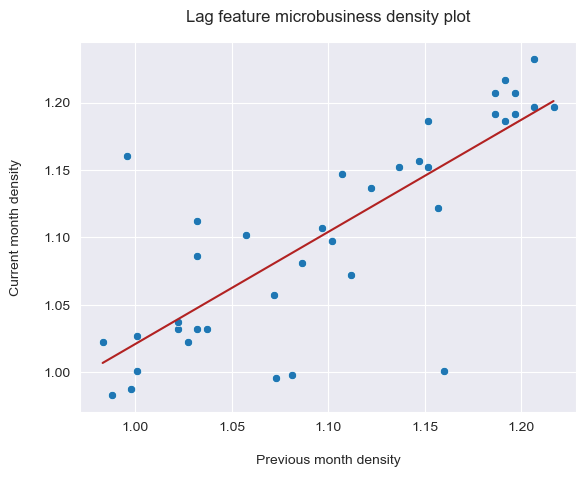

In [16]:
# Plot lag data
fig, ax = plt.subplots(squeeze=False)

sns.lineplot(
    data=y_pred_lag_df,
    x='microbusiness_density_lag',
    y='predicted',
    color='firebrick',
    ax=ax[0, 0]
)

sns.scatterplot(
    data=lin_reg_lag_df,
    x='microbusiness_density_lag',
    y='microbusiness_density',
    ax=ax[0, 0]
)
ax[0, 0].set_title('Lag feature microbusiness density plot', pad=15)
ax[0, 0].set_xlabel('Previous month density', labelpad=15)
ax[0, 0].set_ylabel('Current month density', labelpad=15)

plt.show()

**Conclusion:** From above we can see a strong relation between previous and current month data

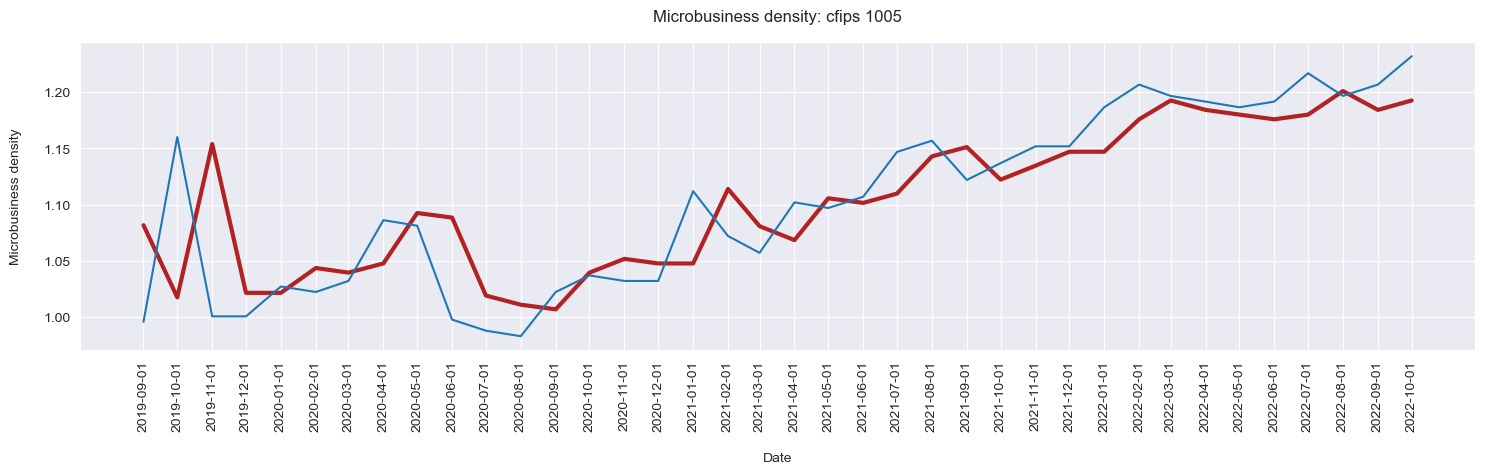

In [17]:
# Plot
fig, ax = plt.subplots(figsize=(18, 4), squeeze=False)

sns.lineplot(
    data=y_pred_lag_df,
    x='first_day_of_month',
    y='predicted',
    ax=ax[0, 0],
    color='firebrick',
    linewidth=3
)

sns.lineplot(
    data=lin_reg_lag_df,
    x='first_day_of_month',
    y='microbusiness_density',
    ax=ax[0, 0]
)
ax[0, 0].set_title(f'Microbusiness density: cfips {cfips}', pad=15)
ax[0, 0].set_xlabel('Date', labelpad=15)
ax[0, 0].set_ylabel('Microbusiness density', labelpad=15)
ax[0, 0].tick_params(axis='x', rotation=90)
ax[0, 0].set_xticks(y_pred_lag_df['first_day_of_month'])

plt.show()

**Conclusion:** even though the system looks more responsive to data changes, it gave worse SMAPE result.

### Linear regression - prediction for 2022-12-01

In [83]:
# Test data
test_day = '2022-12-01'
lin_reg_multiple_y_test = revealed_test.loc[revealed_test['first_day_of_month']==test_day, ['cfips', 'microbusiness_density']]
lin_reg_multiple_y_test.head()

,cfips,microbusiness_density
1,1001,3.470915
3,1003,8.250630
5,1005,1.252272
7,1007,1.287240
9,1009,1.852060


In [135]:
# Prepare data
lin_reg_multiple_df = train_set[['cfips', 'first_day_of_month', 'microbusiness_density']]
lin_reg_multiple_df['first_day_of_month'] = pd.to_datetime(lin_reg_multiple_df['first_day_of_month']) # Convert from str to datetime
lin_reg_multiple_df['first_day_of_month'] = [datetime.datetime.toordinal(x) for x in lin_reg_multiple_df['first_day_of_month']] # Convert to ordinal value

# Create list of predicted values
test_day_ordinal = datetime.datetime.toordinal(datetime.datetime.strptime(test_day, '%Y-%m-%d'))
lin_reg_multiple_y = []


# Create model
lin_reg_multiple_model = linear_model.LinearRegression()

for cfips in lin_reg_multiple_df['cfips'].unique():
    lin_reg_multiple_X_train = lin_reg_multiple_df.loc[lin_reg_multiple_df['cfips']==cfips, ['first_day_of_month']]
    lin_reg_multiple_y_train = lin_reg_multiple_df.loc[lin_reg_multiple_df['cfips']==cfips, ['microbusiness_density']]
    lin_reg_multiple_model.fit(lin_reg_multiple_X_train, lin_reg_multiple_y_train)
    predicted_value = lin_reg_multiple_model.predict([[test_day_ordinal]])
    lin_reg_multiple_y.append(predicted_value[0][0])

C:\Users\lenka\AppData\Local\Temp\ipykernel_4384\1940050301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin_reg_multiple_df['first_day_of_month'] = pd.to_datetime(lin_reg_multiple_df['first_day_of_month']) # Convert from str to datetime
C:\Users\lenka\AppData\Local\Temp\ipykernel_4384\1940050301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin_reg_multiple_df['first_day_of_month'] = [datetime.datetime.toordinal(x) for x in lin_reg_multiple_df['first_day_of_month']] # Convert to ordinal value


In [137]:
smape(lin_reg_multiple_y, lin_reg_multiple_y_test)

ValueError: Unable to coerce to Series, length must be 2: given 3135